/Users/sungchullee/opt/anaconda3/envs/gym/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sungchullee/opt/anaconda3/envs/gym/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sungchullee/opt/anaconda3/envs/gym/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sungchullee/opt/an

Instructions for updating:
Colocations handled automatically by placer.


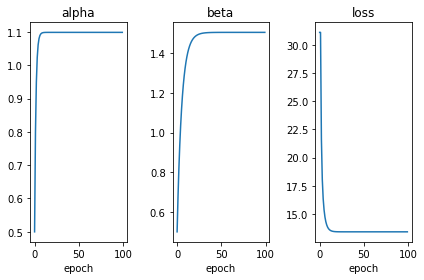

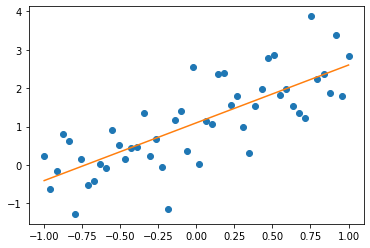

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

lr = 1e-2
epoch = int(1e2)

x_data = np.linspace(-1,1).astype(np.float32).reshape((-1,1)) # (50,1)
y_data = (1.+2.*x_data+0.7*np.random.normal(size=x_data.shape)).astype(np.float32) # (50,1)

x = tf.placeholder(tf.float32, shape=(None,1)) # (50,1)
y = tf.placeholder(tf.float32, shape=(None,1)) # (50,1)

if 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(1.0))
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
elif 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomUniform())
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())

y_pred = alpha + x @ beta
loss = tf.nn.l2_loss(y-y_pred)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

tf.summary.scalar('alpha', alpha)
tf.summary.scalar('loss', loss)
tf.summary.histogram('beta', beta)
merged = tf.summary.merge_all()

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    log_dir = "temp/logfiles" 
    writer = tf.summary.FileWriter(log_dir, sess.graph) 
    # 이 코드를 돌린 후, 다음 스텝을 통하여 텐서보드를 열 수 있다.
    # 터미널을 이용 LOG_DIR로 이동
    # $ tensorboard --logdir=./
    # 크롬 주소창에 다음을 입력하고 엔터: http://localhost:6006/
    
    alpha_trace = []
    beta_trace = []
    loss_trace = []
    
    feed_dict = {x:x_data, y:y_data}
    for i in range(epoch):
        if i == 0:
            alpha_run, beta_run, loss_run, merged_run = sess.run([alpha, beta, loss, merged], feed_dict=feed_dict)
        else:
            alpha_run, beta_run, loss_run, merged_run, _ = sess.run([alpha, beta, loss, merged, train], feed_dict=feed_dict)
        alpha_trace.append(alpha_run)
        beta_trace.append(beta_run[0,0])
        loss_trace.append(loss_run)  
        writer.add_summary(merged_run, i)
    y_pred_run = sess.run(y_pred, feed_dict=feed_dict)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(alpha_trace)
ax1.set_xlabel('epoch')
ax1.set_title('alpha')
ax2.plot(beta_trace)
ax2.set_xlabel('epoch')
ax2.set_title('beta')
ax3.plot(loss_trace)
ax3.set_xlabel('epoch')
ax3.set_title('loss')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1)
ax.plot(x_data.reshape((-1,)), y_data.reshape((-1,)), 'o')
ax.plot(x_data.reshape((-1,)), y_pred_run.reshape((-1,)))
plt.show()